My Supporting code for Final Homework is in https://github.com/Geethik07/Statistical-Data-Mining-I/tree/main/Final%20HW

## Question 3

### Fit a series of random-forest classifiers to the SPAM data, to explore the sensitivity to m (the number of randomly selected inputs for each tree). Plot both the OOB error as well as the test error against a suitably chosen range of values for m.

In [1]:
rm (list =ls())

In [2]:
library(randomForest)
library(ggplot2)
library(dplyr)
library(caret)

randomForest 4.7-1.1

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘ggplot2’


The following object is masked from ‘package:randomForest’:

    margin



Attaching package: ‘dplyr’


The following object is masked from ‘package:randomForest’:

    combine


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: lattice



In [3]:
install.packages("patchwork")


The downloaded binary packages are in
	/var/folders/_3/nbf8r53d0f19nygyl0lz56p40000gn/T//Rtmp370zuy/downloaded_packages


In [4]:
library(patchwork)

In [5]:
spam = read.table("data.spam.txt")

In [6]:
head(spam, 5)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,⋯,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>
1,0.00,0.64,0.64,0,0.32,0.00,0.00,0.00,0.00,0.00,⋯,0.00,0.000,0,0.778,0.000,0.000,3.756,61,278,1
2,0.21,0.28,0.50,0,0.14,0.28,0.21,0.07,0.00,0.94,⋯,0.00,0.132,0,0.372,0.180,0.048,5.114,101,1028,1
3,0.06,0.00,0.71,0,1.23,0.19,0.19,0.12,0.64,0.25,⋯,0.01,0.143,0,0.276,0.184,0.010,9.821,485,2259,1
4,0.00,0.00,0.00,0,0.63,0.00,0.31,0.63,0.31,0.63,⋯,0.00,0.137,0,0.137,0.000,0.000,3.537,40,191,1
5,0.00,0.00,0.00,0,0.63,0.00,0.31,0.63,0.31,0.63,⋯,0.00,0.135,0,0.135,0.000,0.000,3.537,40,191,1


In [7]:
# converting to factor 

spam$V58 <- factor(spam$V58)

In [8]:
rows <- nrow(spam)

In [10]:
# Number of rows for the training set is 80% of the dataset
inTrain <- sample(1:nrow(spam), nrow(spam)*0.80)

In [11]:
#splitting train and test
train <- spam[inTrain ,]
dim(train)
head(train)
test <- spam[-inTrain ,]
dim(test)
head(test)

[1] 3680   58

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,⋯,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<fct>
3774,0.00,0.00,0.00,0,1.23,0,0.00,0.00,0.00,0.00,⋯,0.000,0.468,0.000,0.000,0.000,0.000,1.058,2,18,0
2531,0.00,0.28,0.00,0,0.56,0,0.00,0.00,0.28,0.00,⋯,0.046,0.281,0.046,0.000,0.000,0.000,1.834,15,200,0
4332,0.00,0.00,2.12,0,1.06,0,0.00,0.00,0.00,0.00,⋯,0.000,0.000,0.000,0.000,0.000,0.000,1.238,4,26,0
1270,0.17,0.17,0.00,0,0.52,0,0.00,0.43,0.00,0.17,⋯,0.000,0.376,0.000,0.250,0.721,0.000,2.742,35,617,1
4175,0.00,0.00,0.00,0,0.00,0,0.00,0.00,0.00,0.00,⋯,0.000,0.000,0.000,0.471,0.000,0.000,1.033,2,31,0
235,0.84,0.84,0.00,0,0.00,0,1.69,0.00,0.84,0.84,⋯,0.000,0.000,0.000,1.113,0.278,0.092,173.000,418,519,1


[1] 921  58

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,⋯,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<fct>
9,0.15,0,0.46,0,0.61,0,0.30,0,0.92,0.76,⋯,0,0.271,0,0.181,0.203,0.022,9.744,445,1257,1
21,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0.00,⋯,0,0.729,0,0.729,0.000,0.000,3.833,9,23,1
24,0.00,0,0.00,0,1.16,0,0.00,0,0.00,0.00,⋯,0,0.133,0,0.667,0.000,0.000,1.131,5,69,1
27,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0.00,⋯,0,0.196,0,0.392,0.196,0.000,5.466,22,82,1
28,0.00,0,0.00,0,0.00,0,1.66,0,0.00,0.00,⋯,0,0.000,0,0.368,0.000,0.000,2.611,12,47,1
34,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0.00,⋯,0,0.000,0,0.000,0.302,0.000,1.700,5,17,1


In [12]:
#training random forest

m.var <- c(1:37)

error <- function(var){
  n = length(var)
  obb_error = rep(0,n)
  test_error = rep(0,n)
    
    for(i in var){
    forest <- randomForest(as.factor(V58) ~ .,data = train, mtry = i, ntree = 100)
    predic <- predict(forest, newdata = test)
    obb_error[i] <- mean((forest$predicted != train$V58)^2)
    test_error[i] <- mean((predic != test$V58)^2)
  }
  return(data.frame(obb = obb_error,test_err = test_error))
}

In [13]:
r_errors <- error(m.var)

[1] 6

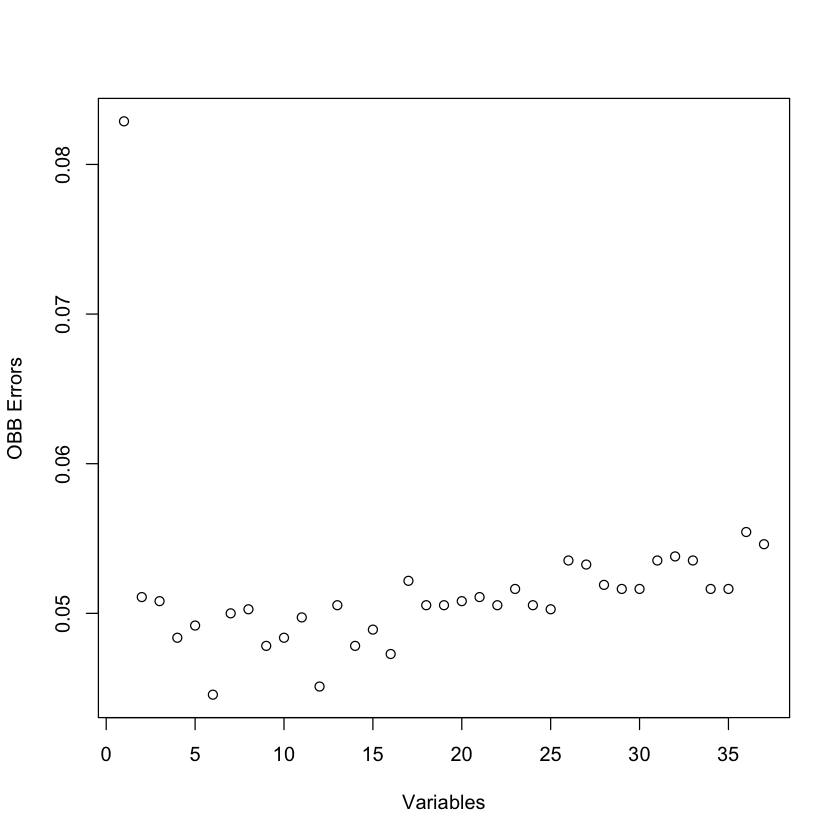

In [14]:
#plotting obb error
plot(m.var, r_errors$obb, xlab = "Variables", ylab = "OBB Errors")

obb_opt <- m.var[which.min(r_errors$obb)]
obb_opt

[1] 10

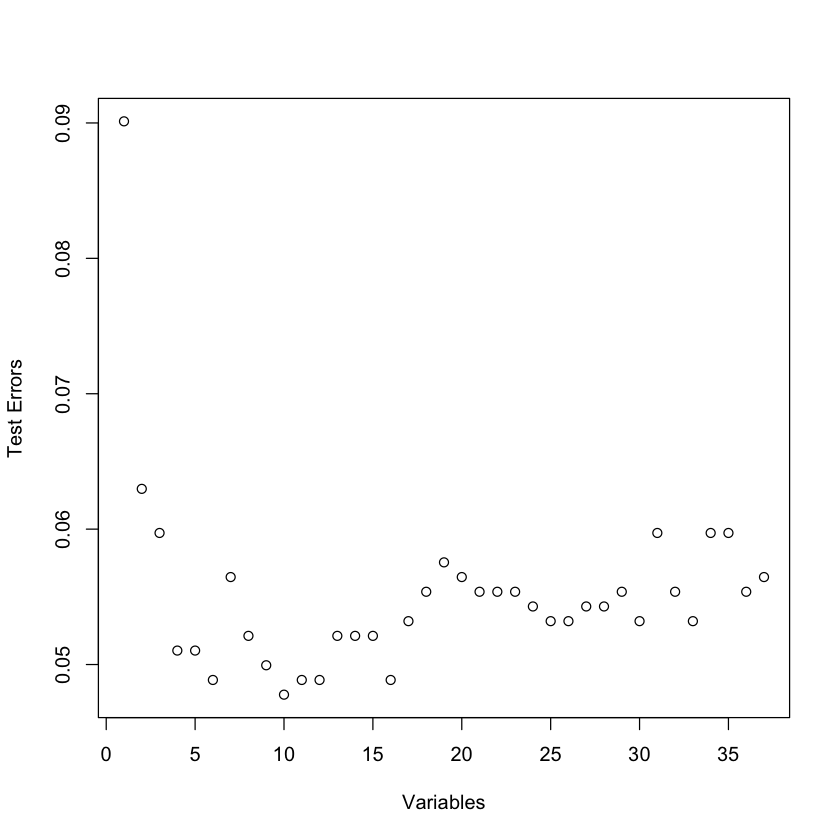

In [15]:
#plotting test error
plot(m.var, r_errors$test_err, xlab = "Variables", ylab = "Test Errors")

test_opt <- m.var[which.min(r_errors$test_err)]
test_opt


In [16]:
forest_err <- min(r_errors$test_err)
forest_err

[1] 0.04777416